### Imports

In [1]:
import os
from PIL import Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Open MNIST dataset

In [2]:
dirs = {}
dirs['features'] = '/mnt/Data/Work/Sources/Petnica/features'
features = np.load(os.path.join(dirs['features'],'autoencoder_features_mnist.npy'))
images = np.load(os.path.join(dirs['features'],'autoencoder_images_mnist.npy'))

#### Visualize features

In [3]:
features.shape

(300, 9)

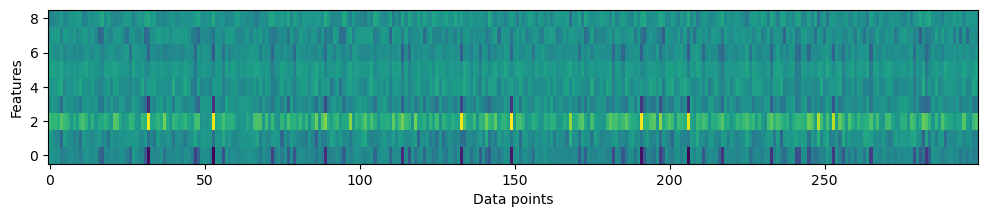

In [4]:
fig, ax = plt.subplots(figsize=(12,2))
ax.imshow(features.T,aspect='auto',origin='lower')
ax.set_xlabel('Data points')
ax.set_ylabel('Features');

#### Correlation matrix to understand whether we have some redundant features

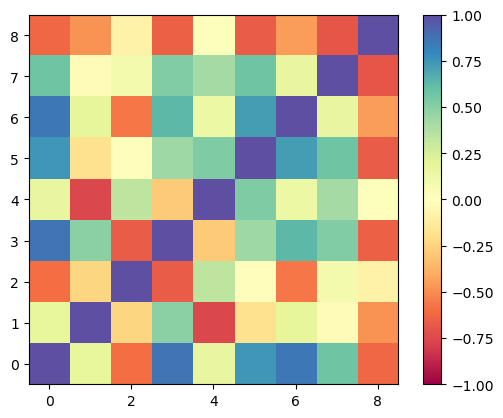

In [5]:
im = plt.imshow(np.corrcoef(features.T),origin='lower',cmap='Spectral',vmin=-1,vmax=1)
plt.colorbar(im)

#### PCA

In [8]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(features)

In [12]:
pca.explained_variance_ratio_

array([5.8629614e-01, 2.0988566e-01, 1.3515490e-01, 5.4422896e-02,
       1.2128515e-02, 1.4994622e-03, 5.1878626e-04, 7.1317918e-05],
      dtype=float32)

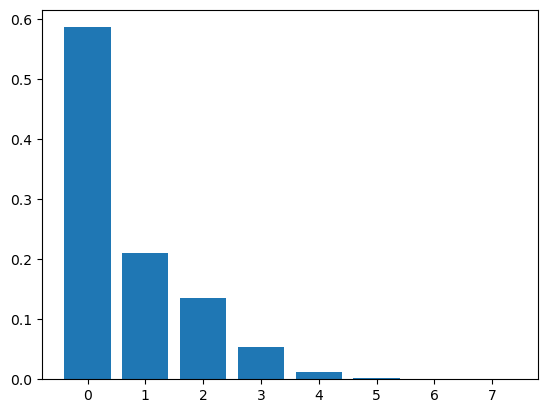

In [17]:
plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_);

#### tSNE embeddings

In [20]:
X_embedded = skl.manifold.TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(features)

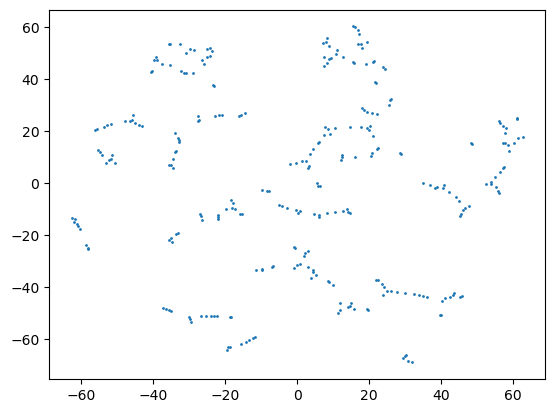

In [22]:
plt.scatter(X_embedded[:,0],X_embedded[:,1],s=1)

In [23]:
hdb_over_tsne = skl.cluster.HDBSCAN(min_cluster_size=6)
hdb_over_tsne.fit(X_embedded)

,min_cluster_size,6
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,None
,metric,'euclidean'
,metric_params,None
,alpha,1.0
,algorithm,'auto'
,leaf_size,40
,n_jobs,None
,cluster_selection_method,'eom'


In [37]:
np.vstack(np.unique(hdb_over_tsne.labels_,return_counts=True))

array([[-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [13,  9, 14,  8, 26, 52,  8, 10, 10,  9, 14, 71, 15, 18,  9, 14]])

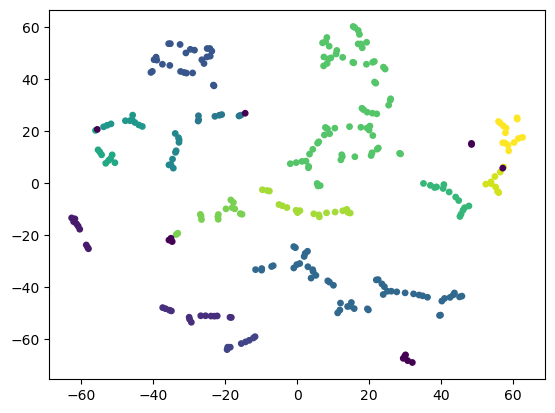

In [38]:
plt.scatter(X_embedded[:,0],X_embedded[:,1],s=15,c=hdb_over_tsne.labels_)

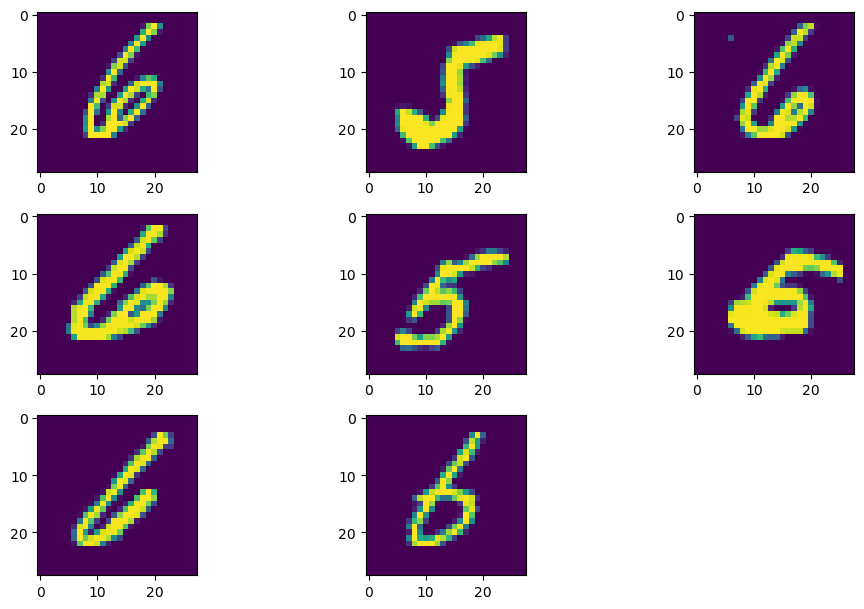

In [32]:
fig = plt.figure(figsize=(10,10))
idx = hdb_over_tsne.labels_==5
plt_imgs = images[idx]
i = 0
while i < 15 and i < len(plt_imgs):
    ax = fig.add_subplot(5,3,i+1)
    ax.imshow(plt_imgs[i])
    i += 1
plt.tight_layout()

### Plot

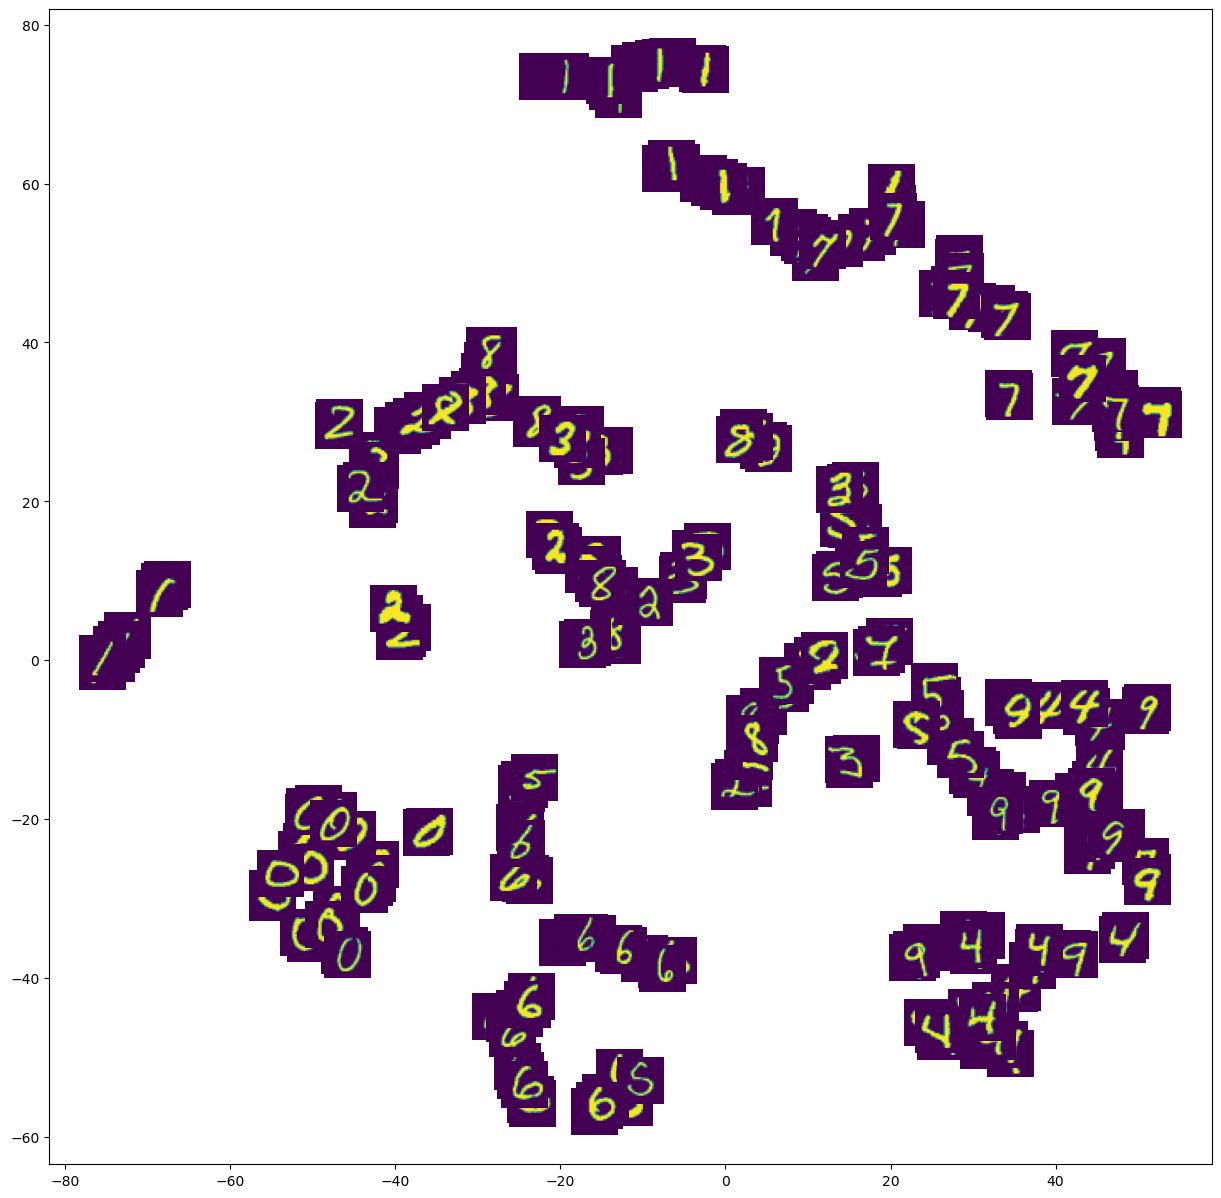

In [11]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data



def main():
    x = X_embedded[:,0]
    y = X_embedded[:,1]
    fig, ax = plt.subplots(figsize=(15,15))
    imscatter(x, y, images, zoom=0.1, ax=ax)
    #ax.plot(x, y)
    plt.show()

def imscatter(x, y, images, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    artists = []
    for x0, y0, image in zip(x, y,images):
        im = OffsetImage(image, zoom=1.2)
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

main()